# Visualizing ECCO Model Output

**Overview**

In this notebook, we will look at a few ways to visualize ocean model output. For this demo, we will use output from the ECCO Ocean State Estimate (Version 4).

**Import Modules**

First, import the modules required to access data from netCDF files and create plots:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Data for this notebook
In this notebook, we will use temperature data from the Versions 4 state estimate. To download the data, you can use the [Downloading ECCO V4 Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20V4%20Data.ipynb) notebook available on the Github for this book. Use the following settings to download the pertinent data:

```
version = 'Version4'
release = 'Release4'
subset = 'interp_monthly'
var_name = 'THETA'
start_year = 2015
end_year = 2015
```

Once the data is downloaded, identify the location of your data folder here:

In [2]:
# Define a path to a data folder
data_folder = '../data'

## Plotting profiles
With the data in hand, we are now ready to begin visualizing model differences across space and time. As a first start, let's begin by investigating vertical profiles of temperature in the Labrador Sea - an important location for thermohaline circulation in the Arctic.

The Labrador sea is located off the east coast of Canada where sea ice forms seasonally. This creates large swings in temperature at the surface of the ocean. Let's investigate profiles of temperature in the Labrador sea between the sea ice maximum in **March** and the sea ice minimum in **September**.

In [3]:
# identify path to the march data file
march_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA','THETA_2015_03.nc')

# identify path to the sept data file
sept_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA','THETA_2015_09.nc')

In [4]:
# read in the march THETA data along with the lon, lat, and depth information
ds = xr.open_dataset(march_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
Z = np.array(ds['Z'][:])
Theta_march = np.array(ds['THETA'][:])
ds.close()

# read in the september THETA data
ds = xr.open_dataset(sept_file)
Theta_sept = ds['THETA'][:]
ds.close()

Now that we've got our data read in, we need to find the location in the data matrix where the Labrador sea is located. The center of the Labrador Sea is around -50$^{\circ}$E, 57.4$^{\circ}$N. One way we can find the indices corresponding to these locations is as follows:

In [5]:
# find the lon index closest to -50 E
lon_index = np.argmin(np.abs(longitude - (-50)))

# find the lat index closest to 57.4 N
lat_index = np.argmin(np.abs(latitude - (57.4)))

# sanity check
print('The longitude at index',lon_index,'is',longitude[lon_index])
print('The latitude at index',lat_index,'is',latitude[lat_index])

The longitude at index 259 is -50.25
The latitude at index 294 is 57.25


We can visualize the location of this point as follows:

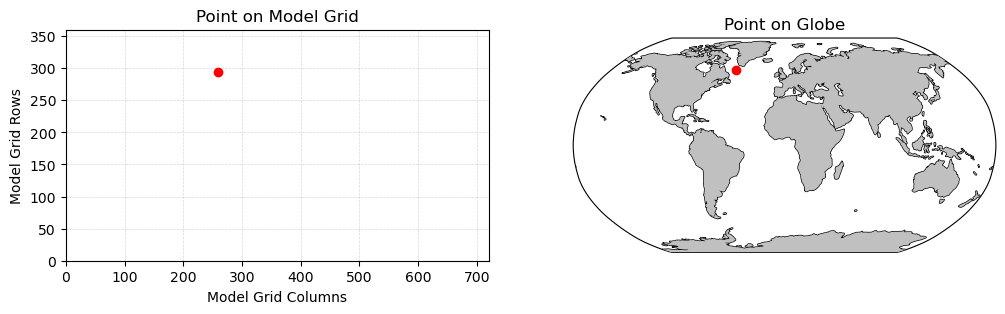

In [6]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.plot(lon_index, lat_index, 'ro')
plt.gca().set_xlim([0,len(longitude)])
plt.gca().set_ylim([0,len(latitude)])
plt.xlabel('Model Grid Columns')
plt.ylabel('Model Grid Rows')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)
plt.title('Point on Model Grid')

plt.subplot(1,2,2,projection=ccrs.Robinson())
# ax = plt.axes()
C = plt.plot(longitude[lon_index], latitude[lat_index], 'ro',
                   transform=ccrs.PlateCarree())
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()
plt.gca().set_global()
plt.title('Point on Globe')
plt.show()

Next, we can use these indices to sample our data:

In [7]:
# sample march data on the longitude and latitude indices
theta_march = Theta_march[0, :, lat_index, lon_index]

# sample sept data on the longitude and latitude indices
theta_sept = Theta_sept[0, :, lat_index, lon_index]

Finally, we can make a plot of these profiles as follows:

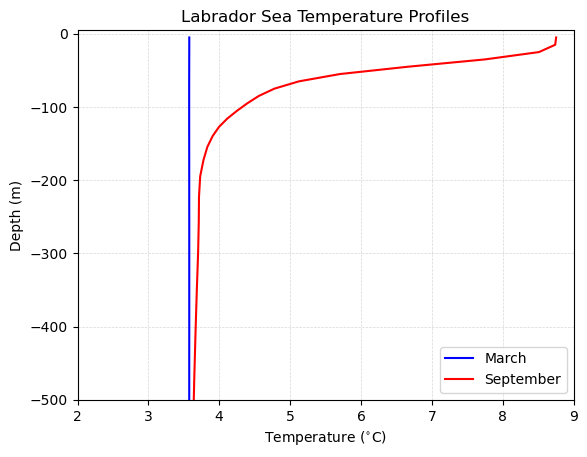

In [8]:
# make a figure
fig = plt.figure()

# plot the march profile in blue
plt.plot(theta_march, Z, '-', color='blue', label='March')

# plot the sept profile in red
plt.plot(theta_sept, Z, '-', color='red', label='September')

# add a legend in the 4th quadrant
plt.legend(loc = 4)

# format the axes
plt.gca().set_xlim([2,9])
plt.gca().set_ylim([-500,5])
plt.ylabel('Depth (m)')
plt.xlabel('Temperature ($^{\circ}$C)')
plt.title('Labrador Sea Temperature Profiles')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)

# show the plot
plt.show()

## Plotting Timeseries
In the above example, we saw that there were large variations in temperature between winter and summer in the surface of the Labrador sea. What if we wanted to see how this varies through the entire year? It would be a little bit cumbersome to repeat the same code over and over - thankfully, we can leverge a `for` loop in Python to read from all of the files individually.

Begin by making a list of the files to read in. Note that months 1-9 are formatted with a leading 0. You can achieve this in Python with the format `'{:02d}'.format(month)`.

In [9]:
# make a list to contain the file names
file_list = []

# loop through the 12 months
for month in range(1,13):
    file_list.append('THETA_2015_'+'{:02d}'.format(month)+'.nc')

# print out the file names
print(file_list)

['THETA_2015_01.nc', 'THETA_2015_02.nc', 'THETA_2015_03.nc', 'THETA_2015_04.nc', 'THETA_2015_05.nc', 'THETA_2015_06.nc', 'THETA_2015_07.nc', 'THETA_2015_08.nc', 'THETA_2015_09.nc', 'THETA_2015_10.nc', 'THETA_2015_11.nc', 'THETA_2015_12.nc']


Next, read in the temperature value in the Labrador Sea by looping through the files in the list. Each time a new file is read, store the value in a list:

In [10]:
# make a list to store the temperature values
temperature_values = []

# loop through each file
for file_name in file_list:
    
    # identify path to the data file
    month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA',file_name)
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    Theta = np.array(ds['THETA'][:])
    ds.close()

    # add the data point from the surface of the Labrador Sea to
    # the list of temperatures
    temperature_value = Theta[0, 0, lat_index, lon_index]
    temperature_values.append(temperature_value)

# convert list to a numpy array
temperature_values = np.array(temperature_values)

# print out the temperature values as a sanity check
print(temperature_values)

[3.76600361 3.65341687 3.57717156 3.6944468  4.34336519 5.44754696
 8.49587822 9.89241791 8.75468636 6.65396595 4.81587982 3.69282126]


Now that we have our temperature timeseries, we can plot it through the year:

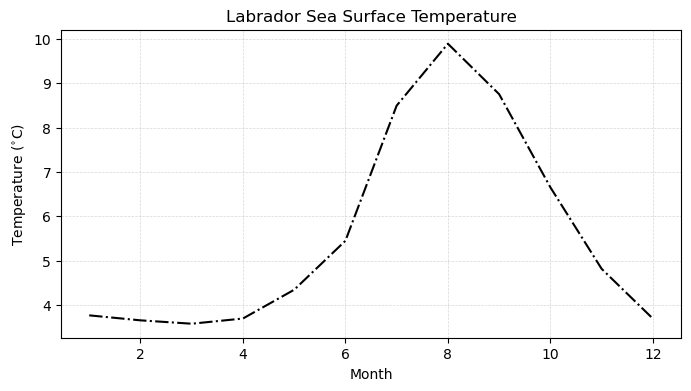

In [11]:
# make a figure
fig = plt.figure(figsize=(8,4))

# plot the temperatures in black
plt.plot(np.arange(1,13), temperature_values, '-.', color='black')

# format the axes
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Month')
plt.title('Labrador Sea Surface Temperature')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)

# show the plot
plt.show()

## Hovmöller Diagrams
In the two exercises above, we investigated properties in the Labrador Sea in two different ways - a comparison in a spatial direction (e.g. vertical) and a comparison through time. A *Hovmöller* diagram allows us to have the best of both worlds, visualizing variations in one spatial direction *and* in time.

Similar to the timeseries plot above, we can loop through all of the available files and store profiles of temperature through time:

In [12]:
# make a list to store the temperature values
temperature_array = np.zeros((len(Z), 12))

# loop through each file, accessing them by index
for i in range(len(file_list)):

    # identify the file name
    file_name = file_list[i]
    
    # identify path to the data file
    month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','THETA',file_name)
    
    # read in the data at the surface in the Labrador Sea
    ds = xr.open_dataset(month_file)
    Theta = np.array(ds['THETA'][:])
    ds.close()

    # add the profile to the array
    temperature_array[:, i] = Theta[0, :, lat_index, lon_index]

Now, make a plot of the temperature array using either the `pcolormesh` or the `contourf` plotting routines:

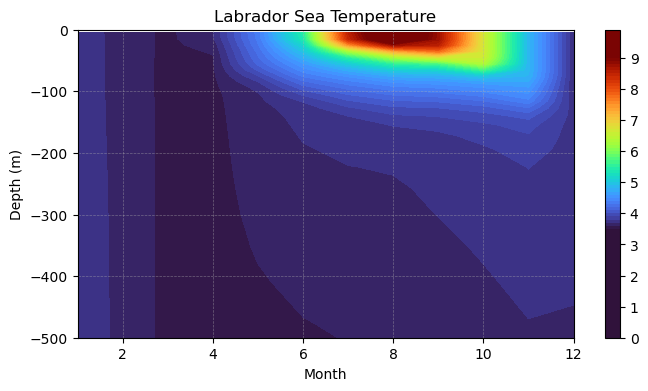

In [13]:
# make a figure
fig = plt.figure(figsize=(8,4))

# plot the temperature array with pcolormesh or contourf
plt.contourf(np.arange(1,13), Z, temperature_array,
            levels=100, vmin=3.5, vmax=9, cmap='turbo')

# add a colorbar
plt.colorbar()

# format the axes
plt.ylabel('Depth (m)')
plt.xlabel('Month')
plt.title('Labrador Sea Temperature')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)
plt.gca().set_ylim([-500,0])

# show the plot
plt.show()

This type of plot gives us much more information than either of two above since we have both time and depth information.

## Plotting Geographic Data with Cartopy
When we are working with numerical ocean model data, our numerical models often represent locations on the globe. In these situations, it is helpful to plot our data in a projection that represents this aspect of our data. With this in mind, we'll invstigate plotting with the `cartopy` package which refers to **carto**graphy with **py**thon. 

Before plotting with the `cartopy` package, let's plot the global temperature field in a given month to see how our plot looks without the geographic information:

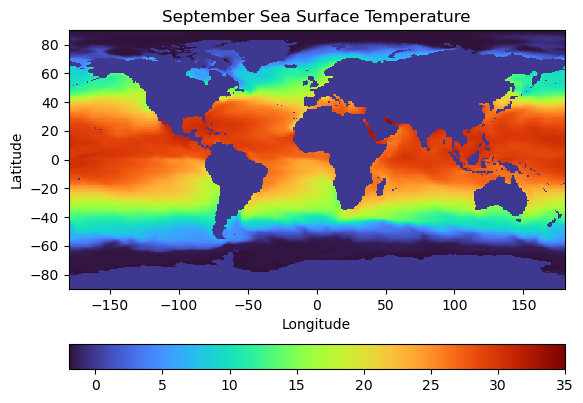

In [14]:
# create a figure object
fig = plt.figure()

# plot the temperature
plt.pcolormesh(longitude, latitude, Theta_sept[0,0,:,:], vmin=-2, vmax=35, cmap='turbo')
plt.colorbar(orientation = 'horizontal')

# format the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('September Sea Surface Temperature')
plt.show()

In looking at the plot above, there's at least two things that are dissatisfying. First, the world is very distorted at the poles. Second, the continents are filled in with a default value of 0, which is a possible temperature value - kinda confusing. We can remedy both of these using `cartopy` by choosing a better projection for our data and adding polygons that cover the coastline. 

Take a look at the plotting code below:

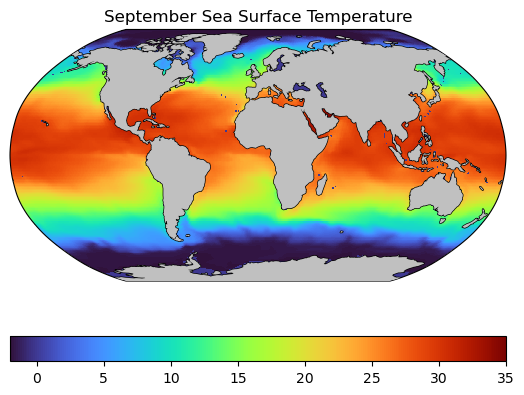

In [15]:
# create a figure object
fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson())

# plot the seaice
plt.pcolormesh(longitude, latitude, Theta_sept[0,0,:,:], vmin=-2, vmax=35, cmap='turbo',
               transform=ccrs.PlateCarree())
plt.colorbar(orientation = 'horizontal')

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# format the axes
plt.title('September Sea Surface Temperature')
plt.show()

### &#x1F914; Spot the differences
What are the key differences between the code that generates the plot above compared to the previous plot?

There are three key changes to the plot above:
1. The axes are defined in a *Robinson* projection using the line `ax = plt.axes(projection=ccrs.Robinson())`
2. The projection of the data us defined in latitude-longitude coordinates with the line `transform=ccrs.PlateCarree()`. This line is key to ensure the data is located in the right location on the map.
3. The coastlines are added with the following lines: `plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')` and `plt.gca().coastlines()`. These lines give the plot the nice land polygons that mask out (most) of the nonsensical data.

### Projections
As you can see above, the axes object provides the projection system for the map. We see that a `projection` parameter has been set to a specific projection - in this case the `Robinson` projection. The `cartopy` package has a variety of different projections for plotting mapped data. You can test some of the following common projections by modifying the plot above:

| Projection Code | Default Parameters |
|-----------------|--------------------|
| PlateCarree()  | central_longitude=0.0 |
| Mollweide()     | central_longitude=0.0 |
| Orthographic()  | central_longitude=0.0, central_latitude=0.0 |
| Robinson()      | central_longitude=0.0 |
| InterruptedGoodeHomolosine() | central_longitude=0.0 |

When you find your favorite projection, try changing the default central longitude/latitude to see how the plot changes.